## Import Usefull Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import string
import nltk
from nltk.corpus  import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Archive.zip")

In [ ]:
data.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Alcohol_Consumption,0
Physical_Activity_Level,0
BMI,0
Diabetes,0
Hypertension,0
Cholesterol_Level,0
Resting_BP,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(50000, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

In [ ]:
Heart_Attack_Risk = data["Heart_Attack_Risk"].value_counts().sort_values(ascending = False)[:10]

In [ ]:
Heart_Attack_Risk

,count
Heart_Attack_Risk,
Low,25024
Moderate,14904
High,10072


In [ ]:
# Define the values to filter
valid_values = ["High", "Medium", "Low"]  # Example values to filter

# Filter rows based on those values
Heart_Attack_Risk = data.loc[data["Heart_Attack_Risk"].isin(valid_values), :]

print(Heart_Attack_Risk)

       Age  Gender  Smoking  Alcohol_Consumption Physical_Activity_Level  \
0       69  Female        1                    0                Moderate   
2       89    Male        0                    1                Moderate   
3       78    Male        0                    1                Moderate   
5       41    Male        0                    1                Moderate   
6       20    Male        1                    0                     Low   
...    ...     ...      ...                  ...                     ...   
49992   62  Female        0                    0                Moderate   
49993   77  Female        0                    1                Moderate   
49994   73    Male        0                    0                Moderate   
49995   21    Male        0                    0                     Low   
49997   46    Male        0                    1                    High   

         BMI  Diabetes  Hypertension  Cholesterol_Level  Resting_BP  \
0      34.61    

In [ ]:
data.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


## LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Physical_Activity_Level"] = le.fit_transform(data["Physical_Activity_Level"])
data["Stress_Level"] = le.fit_transform(data["Stress_Level"])
data["Chest_Pain_Type"] = le.fit_transform(data["Chest_Pain_Type"])
data["Thalassemia"] = le.fit_transform(data["Thalassemia"])
data["ECG_Results"] = le.fit_transform(data["ECG_Results"])
data["Heart_Attack_Risk"] = le.fit_transform(data["Heart_Attack_Risk"])


In [ ]:
le = LabelEncoder()
le_columns = ["Physical_Activity_Level", "Stress_Level", "Chest_Pain_Type", "Thalassemia", "ECG_Results", "Heart_Attack_Risk"]
for column in le_columns:
  data[column] = le.fit_transform(data[column])

In [ ]:
data.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,2,34.61,1,0,152.1,171,85,0,2,2,2,0,1,0,114,1
1,32,Male,0,0,2,22.75,0,0,166.8,126,103,0,1,0,1,0,2,0,173,2
2,89,Male,0,1,2,35.32,0,0,272.3,123,127,0,1,3,2,0,2,0,109,1
3,78,Male,0,1,2,18.23,1,0,237.7,144,125,0,1,3,0,1,0,0,129,1
4,38,Female,1,0,2,19.82,0,0,207.7,123,107,0,0,0,2,0,2,0,124,2


## BALANCING-DATA

In [ ]:

balanced_data = pd.DataFrame()

for class_con in data['Heart_Attack_Risk'].unique() :
  class_data = data[data['Heart_Attack_Risk'] == class_con]
  if len(class_data) > 12000 :
    sample_data = class_data.sample(n = 12000, random_state = 42, replace = False)
  else :
    sample_data = class_data.sample(n = 12000, random_state = 42, replace = True)
  balanced_data = pd.concat([balanced_data, sample_data])

In [ ]:
balanced_data["Heart_Attack_Risk"].value_counts()

,count
Heart_Attack_Risk,
1,12000
2,12000
0,12000


In [ ]:
data = balanced_data
final_data = data.reset_index()

In [ ]:
final_data = data.sample(frac = 1)
final_data.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
25595,34,Female,0,1,1,19.85,0,0,294.2,135,91,0,2,3,2,0,1,0,152,0
44541,72,Male,0,0,0,33.77,0,0,225.7,110,104,0,2,0,0,0,1,0,194,0
2849,64,Male,1,1,2,39.82,0,0,205.7,137,77,1,0,0,0,0,0,0,165,1
4968,36,Female,0,1,1,35.99,0,1,296.2,152,73,1,2,3,2,0,2,0,115,0
49049,35,Male,0,1,2,29.57,0,0,150.2,151,91,0,2,0,1,0,2,0,128,2


## DATA-SPLITTING

In [ ]:



from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score,precision_score,recall_score
import math
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

y = final_data["Heart_Attack_Risk"]
X = final_data[["Age", "Gender", "Smoking", "Alcohol_Consumption", "Physical_Activity_Level", "BMI", "Diabetes", "Hypertension", "Cholesterol_Level", "Resting_BP", "Heart_Rate", "Family_History", "Stress_Level", "Chest_Pain_Type", "Thalassemia",
                "Fasting_Blood_Sugar", "ECG_Results", "Exercise_Induced_Angina", "Max_Heart_Rate_Achieved", "Heart_Attack_Risk"]] # Use square brackets to select columns

X_train,X_temp,y_train,y_temp = train_test_split(X, y, test_size = 0.4, stratify = y, random_state= 42)
X_test,X_cv,y_test,y_cv = train_test_split(X_temp,y_temp, test_size = 0.5, stratify = y_temp, random_state = 42)

print("Training Set Size : ", X_train.shape)
print("Testing Set Size : ", X_test.shape)
print("CV Set Size : ", X_cv.shape)

Training Set Size :  (21600, 20)
Testing Set Size :  (7200, 20)
CV Set Size :  (7200, 20)


## KNN WITHOUT OPTIMAL-K

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Gender' column in both training and testing sets
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.transform(X_test['Gender'])
X_cv['Gender'] = le.transform(X_cv['Gender'])
# ... (apply similar transformations to other categorical features if needed)
#Fit the KNN Model
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_test_pred=knn.predict(X_test)
y_cv_pred=knn.predict(X_cv)

print("Test Accuracy is:",accuracy_score(y_test,y_test_pred))
print("Cv Accuracy is:",accuracy_score(y_cv,y_cv_pred))

Test Accuracy is: 0.38166666666666665
Cv Accuracy is: 0.3863888888888889


## FIND OPTIMAL-K

Optimal-k for knn is: 1


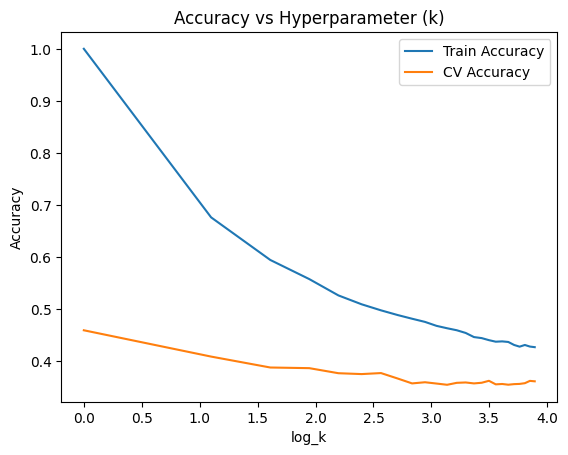

In [ ]:
import math

k=list(range(1,50,2))

train_accuracy=[]
cv_accuracy=[]

for i in k:
  clf=KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train,y_train)
  y_train_pred=clf.predict(X_train)
  y_cv_pred=clf.predict(X_cv)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  cv_accuracy.append(accuracy_score(y_cv,y_cv_pred))

optimal_k=k[cv_accuracy.index(max(cv_accuracy))]
print("Optimal-k for knn is:",optimal_k)

log_k=[math.log(x) for x in k]

plt.plot(log_k,train_accuracy,label="Train Accuracy")
plt.plot(log_k,cv_accuracy,label="CV Accuracy")
plt.title('Accuracy vs Hyperparameter (k)')
plt.xlabel("log_k")
plt.ylabel("Accuracy")
plt.legend()

## KNN BY USING OPTIMAL-K

In [ ]:
knn=KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train,y_train)
y_test_pred=knn.predict(X_test)
y_cv_pred=knn.predict(X_cv)

y_test_accuracy=accuracy_score(y_test,y_test_pred)
y_cv_accuracy=accuracy_score(y_cv,y_cv_pred)

y_test_precision=precision_score(y_test,y_test_pred,average="macro")
y_cv_precision=precision_score(y_cv,y_cv_pred,average="macro")

y_test_recall=recall_score(y_test,y_test_pred,average="macro")
y_cv_recall=recall_score(y_cv,y_cv_pred,average="macro")

print("Acuuracy Score:")
print(f"Test accuracy score is:{y_test_accuracy:.4f}")
print(f"CV accuracy score is:{y_cv_accuracy:.4f}")

print("Precision Score:")
print(f"Test Precision score is:{y_test_precision:.4f}")
print(f"CV Precision score is:{y_cv_precision:.4f}")

print("Recall Score:")
print(f"Test Recall score is:{y_test_recall:.4f}")
print(f"CV Recall score is:{y_cv_recall:.4f}")

col=["Model","Test Accuracy","CV Accuracy","Test Presision","CV Precision","Test Recall","CV Recall"]

batch1=pd.DataFrame([["KNN",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

Acuuracy Score:
Test accuracy score is:0.4644
CV accuracy score is:0.4592
Precision Score:
Test Precision score is:0.4569
CV Precision score is:0.4503
Recall Score:
Test Recall score is:0.4644
CV Recall score is:0.4592


## CONFUSION MATRIX

Text(50.722222222222214, 0.5, 'predicted Values')

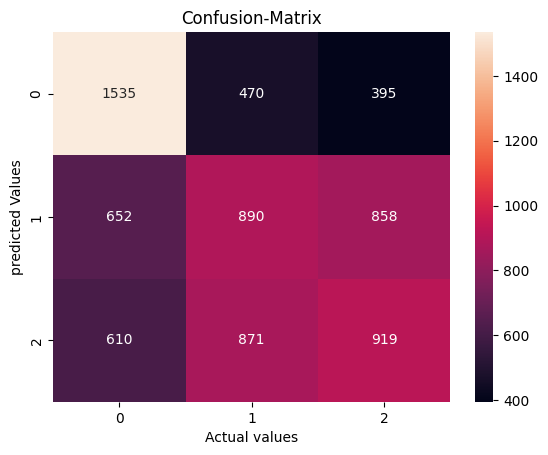

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

## NAVIE BAYES WITHOUT OPTIMAL-K

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

nb.fit(X_train,y_train)
y_test_pred=nb.predict(X_test)
y_cv_pred=nb.predict(X_cv)

print("Test Accuracy score is:",accuracy_score(y_test,y_test_pred))
print("CV Accuracy score is:",accuracy_score(y_cv,y_cv_pred))

Test Accuracy score is: 0.9533333333333334
CV Accuracy score is: 0.9491666666666667


## FIND OPTIMAL ALPHA

optimal_alpha is: 10


Text(0, 0.5, 'Accuracy')

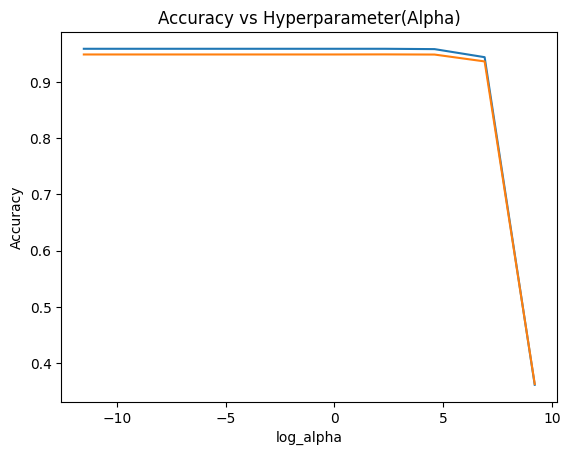

In [ ]:
alpha=[10000,1000,100,10,1,0.1,0.01,0.0001,0.00001]

train_accuracy=[]
cv_accuracy=[]

for i in alpha:
  clf=MultinomialNB(alpha=i)
  clf.fit(X_train,y_train)
  y_train_pred=clf.predict(X_train)
  y_cv_pred=clf.predict(X_cv)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  cv_accuracy.append(accuracy_score(y_cv,y_cv_pred))

optimal_alpha=alpha[cv_accuracy.index(max(cv_accuracy))]
print("optimal_alpha is:",optimal_alpha)

log_alpha=[math.log(x) for x in alpha]
plt.plot(log_alpha,train_accuracy,label="Train Accuracy")
plt.plot(log_alpha,cv_accuracy,label="CV Accuracy")
plt.title("Accuracy vs Hyperparameter(Alpha)")
plt.xlabel("log_alpha")
plt.ylabel("Accuracy")

## NAVIE BAYES BY USING HYPERPARAMETER ALPHA

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB(alpha=optimal_alpha)

nb.fit(X_train,y_train)
y_test_pred=nb.predict(X_test)
y_cv_pred=nb.predict(X_cv)

y_test_accuracy=accuracy_score(y_test,y_test_pred)
y_cv_accuracy=accuracy_score(y_cv,y_cv_pred)

y_test_precision=precision_score(y_test,y_test_pred,average="micro")
y_cv_precision=precision_score(y_cv,y_cv_pred,average="micro")

y_test_recall=recall_score(y_test,y_test_pred,average="micro")
y_cv_recall=recall_score(y_cv,y_cv_pred,average="micro")


print("Acuuracy Score:")
print(f"Test accuracy score is:{y_test_accuracy:.4f}")
print(f"CV accuracy score is:{y_cv_accuracy:.4f}")

print("Precision Score:")
print(f"Test Precision score is:{y_test_precision:.4f}")
print(f"CV Precision score is:{y_cv_precision:.4f}")

print("Recall Score:")
print(f"Test Recall score is:{y_test_recall:.4f}")
print(f"CV Recall score is:{y_cv_recall:.4f}")

batch2=pd.DataFrame([["Naive Bayes",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

Acuuracy Score:
Test accuracy score is:0.9536
CV accuracy score is:0.9493
Precision Score:
Test Precision score is:0.9536
CV Precision score is:0.9493
Recall Score:
Test Recall score is:0.9536
CV Recall score is:0.9493


Text(50.722222222222214, 0.5, 'predicted Values')

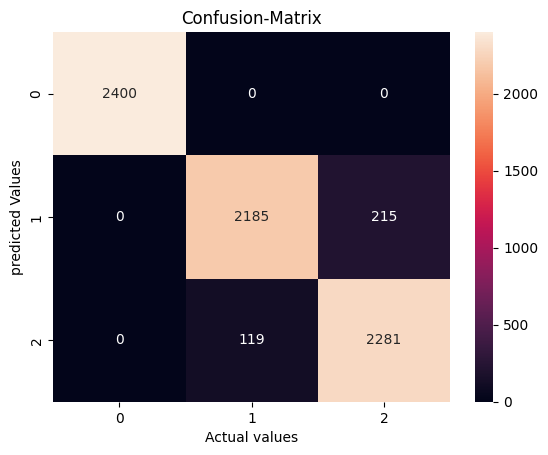

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

## LOSS(L1)
## LOGISTIC REGRESSION WITHOUT HYPERPARAMETER TUNING

In [ ]:
from sklearn.linear_model import LogisticRegression

lor=LogisticRegression(penalty="l1",solver="liblinear")

lor.fit(X_train,y_train)
y_test_pred=lor.predict(X_test)
y_cv_pred=lor.predict(X_cv)

print("Test accuracy is:",accuracy_score(y_test,y_test_pred))
print("CV accuracy is:",accuracy_score(y_cv,y_cv_pred))

Test accuracy is: 1.0
CV accuracy is: 1.0


## HYPERPARAMETER TUNING TO FIND OPTIMAL-C

optimal_c is: 10000


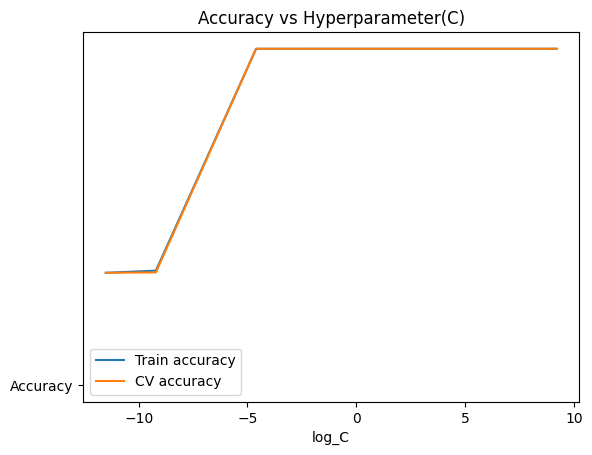

In [ ]:
C=[10000,1000,100,10,1,0.1,0.01,0.0001,0.00001]

train_accuracy=[]
cv_accuracy=[]

for i in C:
  clf=LogisticRegression(C=i,penalty="l1",solver="liblinear")
  clf.fit(X_train,y_train)
  y_train_pred=clf.predict(X_train)
  y_cv_pred=clf.predict(X_cv)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  cv_accuracy.append(accuracy_score(y_cv,y_cv_pred))

optimal_C=C[cv_accuracy.index(max(cv_accuracy))]

print("optimal_c is:",optimal_C)

log_C=[math.log(x) for x in C]
plt.plot(log_C,train_accuracy,label="Train accuracy")
plt.plot(log_C,cv_accuracy,label="CV accuracy")
plt.title("Accuracy vs Hyperparameter(C)")
plt.xlabel("log_C")
plt.plot("Accuracy")
plt.legend()

## LOGISTIC REGRESSION BY USING USING HYPERPARAMETER TUNING

In [ ]:
from sklearn.linear_model import LogisticRegression

lor=LogisticRegression(C=optimal_C,penalty="l1",solver="liblinear")

lor.fit(X_train,y_train)
y_test_pred=lor.predict(X_test)
y_cv_pred=lor.predict(X_cv)

y_test_accuracy=accuracy_score(y_test,y_test_pred)
y_cv_accuracy=accuracy_score(y_cv,y_cv_pred)

y_test_precision=precision_score(y_test,y_test_pred,average="macro")
y_cv_precision=precision_score(y_cv,y_cv_pred,average="macro")

y_test_recall=recall_score(y_test,y_test_pred,average="macro")
y_cv_recall=recall_score(y_cv,y_cv_pred,average="macro")

print("Acuuracy Score:")
print(f"Test accuracy score is:{y_test_accuracy:.4f}")
print(f"CV accuracy score is:{y_cv_accuracy:.4f}")

print("Precision Score:")
print(f"Test Precision score is:{y_test_precision:.4f}")
print(f"CV Precision score is:{y_cv_precision:.4f}")

print("Recall Score:")
print(f"Test Recall score is:{y_test_recall:.4f}")
print(f"CV Recall score is:{y_cv_recall:.4f}")

batch3=pd.DataFrame([["Logistic Regression-L1",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

Acuuracy Score:
Test accuracy score is:1.0000
CV accuracy score is:1.0000
Precision Score:
Test Precision score is:1.0000
CV Precision score is:1.0000
Recall Score:
Test Recall score is:1.0000
CV Recall score is:1.0000


## CONFUSION MATRIX FOR(L1)

Text(50.722222222222214, 0.5, 'predicted Values')

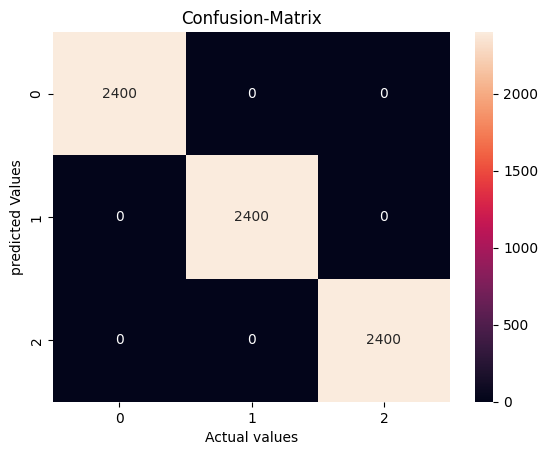

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

## LOGISTIC REGRESSION WITHOUT HYPERPARAMETER TUNING(L2)

In [ ]:
from sklearn.linear_model import LogisticRegression

lor=LogisticRegression(max_iter=500,solver="saga")

lor.fit(X_train,y_train)
y_test_pred=lor.predict(X_test)
y_cv_pred=lor.predict(X_cv)

print("Test accuracy is:",accuracy_score(y_test,y_test_pred))
print("CV accuracy is:",accuracy_score(y_cv,y_cv_pred))

Test accuracy is: 1.0
CV accuracy is: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## HYPERPARAMETER TUNING TO FIND OPTIMAL-C

optimal_c is: 10000


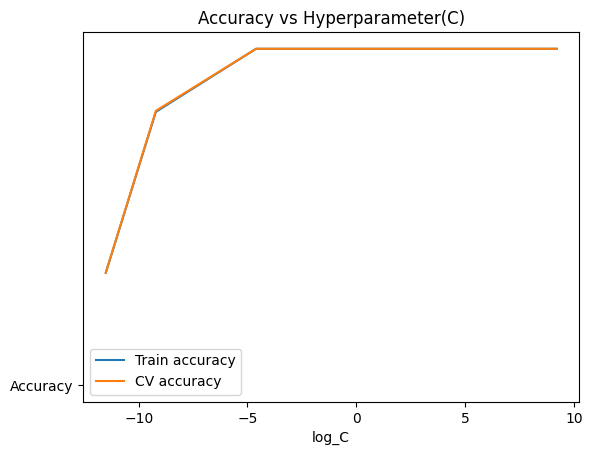

In [ ]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Suppress all warnings (not recommended)
warnings.filterwarnings("ignore")

C=[10000,1000,100,10,1,0.1,0.01,0.0001,0.00001]

train_accuracy=[]
cv_accuracy=[]

for i in C:
  clf=LogisticRegression(C=i,max_iter=1000,solver="saga",penalty="elasticnet",l1_ratio=0.5)
  clf.fit(X_train,y_train)
  y_train_pred=clf.predict(X_train)
  y_cv_pred=clf.predict(X_cv)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  cv_accuracy.append(accuracy_score(y_cv,y_cv_pred))

optimal_C=C[cv_accuracy.index(max(cv_accuracy))]

print("optimal_c is:",optimal_C)

log_C=[math.log(x) for x in C]
plt.plot(log_C,train_accuracy,label="Train accuracy")
plt.plot(log_C,cv_accuracy,label="CV accuracy")
plt.title("Accuracy vs Hyperparameter(C)")
plt.xlabel("log_C")
plt.plot("Accuracy")
plt.legend()


## LOGISTIC REGRESSION BY USING HYPERPARAMETER OPTIMAL-C

In [ ]:
from sklearn.linear_model import LogisticRegression

lor=LogisticRegression(C=optimal_C,solver="saga",max_iter=500)

lor.fit(X_train,y_train)
y_test_pred=lor.predict(X_test)
y_cv_pred=lor.predict(X_cv)

y_test_accuracy=accuracy_score(y_test,y_test_pred)
y_cv_accuracy=accuracy_score(y_cv,y_cv_pred)

y_test_precision=precision_score(y_test,y_test_pred,average="macro")
y_cv_precision=precision_score(y_cv,y_cv_pred,average="macro")

y_test_recall=recall_score(y_test,y_test_pred,average="macro")
y_cv_recall=recall_score(y_cv,y_cv_pred,average="macro")

print("Acuuracy Score:")
print(f"Test accuracy score is:{y_test_accuracy:.4f}")
print(f"CV accuracy score is:{y_cv_accuracy:.4f}")

print("Precision Score:")
print(f"Test Precision score is:{y_test_precision:.4f}")
print(f"CV Precision score is:{y_cv_precision:.4f}")

print("Recall Score:")
print(f"Test Recall score is:{y_test_recall:.4f}")
print(f"CV Recall score is:{y_cv_recall:.4f}")

batch4=pd.DataFrame([["Logistic Regression-L2",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

Acuuracy Score:
Test accuracy score is:1.0000
CV accuracy score is:1.0000
Precision Score:
Test Precision score is:1.0000
CV Precision score is:1.0000
Recall Score:
Test Recall score is:1.0000
CV Recall score is:1.0000


## ELASTICNET(L1 & L2)
## CONFUSION MATRIX

Text(50.722222222222214, 0.5, 'predicted Values')

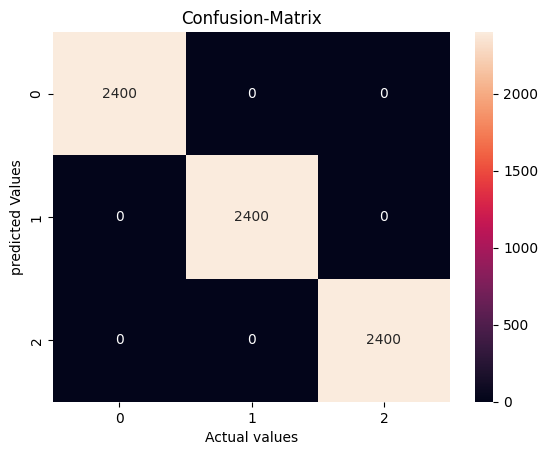

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

## ELASTICNET(L1 & L2)

In [ ]:
from sklearn.linear_model import LogisticRegression

lor=LogisticRegression(max_iter=500,solver="saga",penalty="elasticnet",l1_ratio=0.5)

lor.fit(X_train,y_train)
y_test_pred=lor.predict(X_test)
y_cv_pred=lor.predict(X_cv)

print("Test accuracy is:",accuracy_score(y_test,y_test_pred))
print("CV accuracy is:",accuracy_score(y_cv,y_cv_pred))

Test accuracy is: 1.0
CV accuracy is: 1.0


## HYPERPARAMETER TUNING TO FIND OPTIMAL-C

optimal_c is: 10000


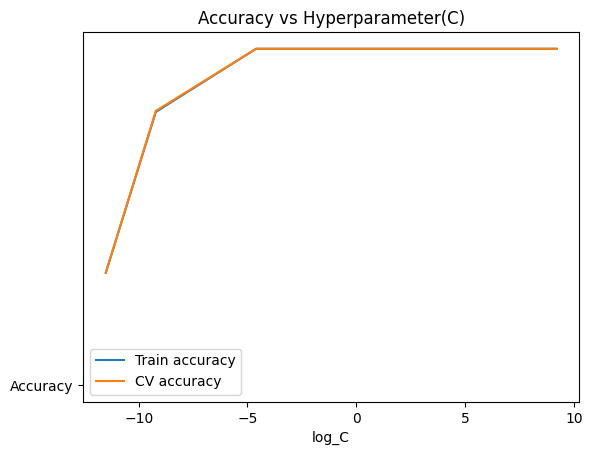

In [ ]:
C=[10000,1000,100,10,1,0.1,0.01,0.0001,0.00001]

train_accuracy=[]
cv_accuracy=[]

for i in C:
  clf=LogisticRegression(C=i,max_iter=1000,solver="saga",penalty="elasticnet",l1_ratio=0.5)
  clf.fit(X_train,y_train)
  y_train_pred=clf.predict(X_train)
  y_cv_pred=clf.predict(X_cv)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  cv_accuracy.append(accuracy_score(y_cv,y_cv_pred))

optimal_C=C[cv_accuracy.index(max(cv_accuracy))]

print("optimal_c is:",optimal_C)

log_C=[math.log(x) for x in C]
plt.plot(log_C,train_accuracy,label="Train accuracy")
plt.plot(log_C,cv_accuracy,label="CV accuracy")
plt.title("Accuracy vs Hyperparameter(C)")
plt.xlabel("log_C")
plt.plot("Accuracy")
plt.legend()

## LOGISTIC REGRESSION BY USING HYPERPARAMETER TUNING OPTIMAL-C

In [ ]:
from sklearn.linear_model import LogisticRegression

lor=LogisticRegression(C=optimal_C,solver="saga",max_iter=500,penalty="elasticnet",l1_ratio=0.5)

lor.fit(X_train,y_train)
y_test_pred=lor.predict(X_test)
y_cv_pred=lor.predict(X_cv)

y_test_accuracy=accuracy_score(y_test,y_test_pred)
y_cv_accuracy=accuracy_score(y_cv,y_cv_pred)

y_test_precision=precision_score(y_test,y_test_pred,average="macro")
y_cv_precision=precision_score(y_cv,y_cv_pred,average="macro")

y_test_recall=recall_score(y_test,y_test_pred,average="macro")
y_cv_recall=recall_score(y_cv,y_cv_pred,average="macro")

print("Acuuracy Score:")
print(f"Test accuracy score is:{y_test_accuracy:.4f}")
print(f"CV accuracy score is:{y_cv_accuracy:.4f}")

print("Precision Score:")
print(f"Test Precision score is:{y_test_precision:.4f}")
print(f"CV Precision score is:{y_cv_precision:.4f}")

print("Recall Score:")
print(f"Test Recall score is:{y_test_recall:.4f}")
print(f"CV Recall score is:{y_cv_recall:.4f}")

batch5=pd.DataFrame([["Logistic Regression-L1&l2",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

Acuuracy Score:
Test accuracy score is:1.0000
CV accuracy score is:1.0000
Precision Score:
Test Precision score is:1.0000
CV Precision score is:1.0000
Recall Score:
Test Recall score is:1.0000
CV Recall score is:1.0000


## CONFUSION MATRIX

Text(50.722222222222214, 0.5, 'predicted Values')

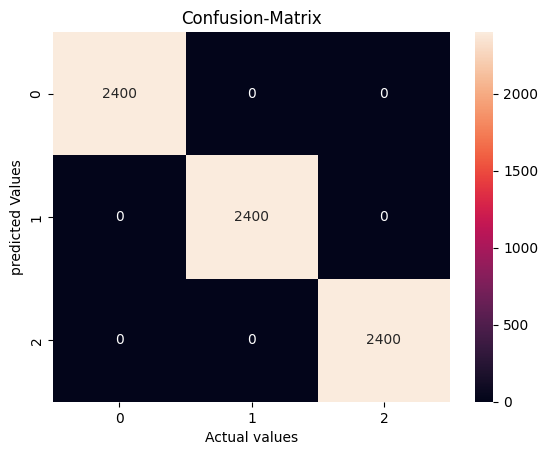

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

## Linear SVM by using Optimal-C

In [ ]:
from sklearn.svm import LinearSVC

linear_svc=LinearSVC(C=optimal_C,random_state=40)

linear_svc.fit(X_train,y_train)
y_test_pred=linear_svc.predict(X_test)
y_cv_pred=linear_svc.predict(X_cv)

y_test_accuracy=accuracy_score(y_test,y_test_pred)
y_cv_accuracy=accuracy_score(y_cv,y_cv_pred)

y_test_precision=precision_score(y_test,y_test_pred,average="macro")
y_cv_precision=precision_score(y_cv,y_cv_pred,average="macro")

y_test_recall=recall_score(y_test,y_test_pred,average="macro")
y_cv_recall=recall_score(y_cv,y_cv_pred,average="macro")

print("Acuuracy Score:")
print(f"Test accuracy score is:{y_test_accuracy:.4f}")
print(f"CV accuracy score is:{y_cv_accuracy:.4f}")

print("Precision Score:")
print(f"Test Precision score is:{y_test_precision:.4f}")
print(f"CV Precision score is:{y_cv_precision:.4f}")

print("Recall Score:")
print(f"Test Recall score is:{y_test_recall:.4f}")
print(f"CV Recall score is:{y_cv_recall:.4f}")

batch6=pd.DataFrame([["Linear SVM (kernal=Linear)",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

Acuuracy Score:
Test accuracy score is:1.0000
CV accuracy score is:1.0000
Precision Score:
Test Precision score is:1.0000
CV Precision score is:1.0000
Recall Score:
Test Recall score is:1.0000
CV Recall score is:1.0000


## Kernal = RBF
## Linear SVM without Hyperparameter Tuning

In [ ]:
from sklearn.svm import SVC

linear_svc=SVC(kernel="rbf",random_state=42)

linear_svc.fit(X_train,y_train)
y_test_pred=linear_svc.predict(X_test)
y_cv_pred=linear_svc.predict(X_cv)

print("Accuracy Score is:",accuracy_score(y_test,y_test_pred))
print("CV score is:",accuracy_score(y_cv,y_cv_pred))

Accuracy Score is: 0.42388888888888887
CV score is: 0.41986111111111113


## Hyperparameter Tuning to find Optimal-C

Optimal-C is: 10000


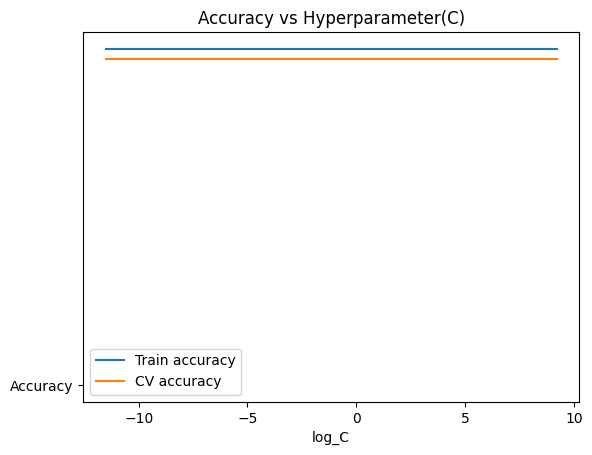

In [ ]:
C=[10000,1000,100,10,1,0.1,0.001,0.0001,0.00001]

train_accuracy=[]
cv_accuracy=[]

for i in C:
  clf=SVC(kernel="rbf",random_state=42)
  clf.fit(X_train,y_train)
  y_train_pred=clf.predict(X_train)
  y_cv_pred=clf.predict(X_cv)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  cv_accuracy.append(accuracy_score(y_cv,y_cv_pred))

optimal_C=C[cv_accuracy.index(max(cv_accuracy))]

print("Optimal-C is:",optimal_C)

log_C=[math.log(x) for x in C]
plt.plot(log_C,train_accuracy,label="Train accuracy")
plt.plot(log_C,cv_accuracy,label="CV accuracy")
plt.title("Accuracy vs Hyperparameter(C)")
plt.xlabel("log_C")
plt.plot("Accuracy")
plt.legend()

## LInear SVM by using Optimal-C

In [ ]:
from sklearn.svm import SVC

linear_svc=SVC(C=optimal_C,random_state=40)

linear_svc.fit(X_train,y_train)
y_test_pred=linear_svc.predict(X_test)
y_cv_pred=linear_svc.predict(X_cv)

y_test_accuracy=accuracy_score(y_test,y_test_pred)
y_cv_accuracy=accuracy_score(y_cv,y_cv_pred)

y_test_precision=precision_score(y_test,y_test_pred,average="macro")
y_cv_precision=precision_score(y_cv,y_cv_pred,average="macro")

y_test_recall=recall_score(y_test,y_test_pred,average="macro")
y_cv_recall=recall_score(y_cv,y_cv_pred,average="macro")

print("Acuuracy Score:")
print(f"Test accuracy score is:{y_test_accuracy:.4f}")
print(f"CV accuracy score is:{y_cv_accuracy:.4f}")

print("Precision Score:")
print(f"Test Precision score is:{y_test_precision:.4f}")
print(f"CV Precision score is:{y_cv_precision:.4f}")

print("Recall Score:")
print(f"Test Recall score is:{y_test_recall:.4f}")
print(f"CV Recall score is:{y_cv_recall:.4f}")

batch7=pd.DataFrame([["Linear SVM (kernal=RBF)",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

Acuuracy Score:
Test accuracy score is:1.0000
CV accuracy score is:1.0000
Precision Score:
Test Precision score is:1.0000
CV Precision score is:1.0000
Recall Score:
Test Recall score is:1.0000
CV Recall score is:1.0000


## Dession Tree
## Without Hyperparameter Tuning(GridSearch)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()

model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(X_train, y_train)

print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 5
optimal max_depth 1


## By Using Hyperparameter Tuning

In [ ]:
clf = DecisionTreeClassifier(max_depth = 1,min_samples_split = 5)
clf.fit(X_train,y_train)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_dt= accuracy_score(y_train,y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
cv_accuracy_dt = accuracy_score(y_cv, y_cv_pred)

train_precision_dt= precision_score(y_train,y_train_pred, average='micro')
test_precision_dt = precision_score(y_test, y_test_pred, average='micro')
cv_precision_dt = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_dt= recall_score(y_train,y_train_pred, average='micro')
test_recall_dt = recall_score(y_test, y_test_pred, average='micro')
cv_recall_dt = recall_score(y_cv, y_cv_pred, average='micro')

batch8=pd.DataFrame([["Dession Tree(GridSearch)",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

## Dession Tree(RandomSearch)
## Without Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()

model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(X_train, y_train)

print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 5
optimal max_depth 1


## Dession Tree(RandomSearch)
## By Using Hyperparameter Tuning

In [ ]:
clf = DecisionTreeClassifier(max_depth = 1,min_samples_split = 5)
clf.fit(X_train,y_train)

import pickle

clf = DecisionTreeClassifier(max_depth = 1,min_samples_split = 5)
clf.fit(X_train,y_train)

import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_dt= accuracy_score(y_train,y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
cv_accuracy_dt = accuracy_score(y_cv, y_cv_pred)

train_precision_dt= precision_score(y_train,y_train_pred, average='micro')
test_precision_dt = precision_score(y_test, y_test_pred, average='micro')
cv_precision_dt = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_dt= recall_score(y_train,y_train_pred, average='micro')
test_recall_dt = recall_score(y_test, y_test_pred, average='micro')
cv_recall_dt = recall_score(y_cv, y_cv_pred, average='micro')

batch9=pd.DataFrame([["Dession Tree(RandomSearch)",test_accuracy_dt,cv_accuracy_dt,test_precision_dt,cv_precision_dt,test_recall_dt,cv_recall_dt]],columns=col)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_dt= accuracy_score(y_train,y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
cv_accuracy_dt = accuracy_score(y_cv, y_cv_pred)

train_precision_dt= precision_score(y_train,y_train_pred, average='micro')
test_precision_dt = precision_score(y_test, y_test_pred, average='micro')
cv_precision_dt = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_dt= recall_score(y_train,y_train_pred, average='micro')
test_recall_dt = recall_score(y_test, y_test_pred, average='micro')
cv_recall_dt = recall_score(y_cv, y_cv_pred, average='micro')

batch9=pd.DataFrame([["Dession Tree(RandomSearch)",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

## Random Forest(GridSearch)
## Without Hyperparameter

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()

model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(X_train, y_train)

print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 5
optimal max_depth 1


## By Using Hyperparameter(GridSearch)

In [ ]:
clf = RandomForestClassifier(max_depth = 1,min_samples_split = 5)
clf.fit(X_train,y_train)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_dt= accuracy_score(y_train,y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
cv_accuracy_dt = accuracy_score(y_cv, y_cv_pred)

train_precision_dt= precision_score(y_train,y_train_pred, average='micro')
test_precision_dt = precision_score(y_test, y_test_pred, average='micro')
cv_precision_dt = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_dt= recall_score(y_train,y_train_pred, average='micro')
test_recall_dt = recall_score(y_test, y_test_pred, average='micro')
cv_recall_dt = recall_score(y_cv, y_cv_pred, average='micro')

batch10=pd.DataFrame([["Random Forest(GridSearch)",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

## RandomForest(RandomSearch)
## Without Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()

model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(X_train, y_train)

print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 5
optimal max_depth 1


## By Using Hyperparameter Tuning(RandomSearch)

In [ ]:
clf = RandomForestClassifier(max_depth = 1,min_samples_split = 5)
clf.fit(X_train,y_train)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_dt= accuracy_score(y_train,y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
cv_accuracy_dt = accuracy_score(y_cv, y_cv_pred)

train_precision_dt= precision_score(y_train,y_train_pred, average='micro')
test_precision_dt = precision_score(y_test, y_test_pred, average='micro')
cv_precision_dt = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_dt= recall_score(y_train,y_train_pred, average='micro')
test_recall_dt = recall_score(y_test, y_test_pred, average='micro')
cv_recall_dt = recall_score(y_cv, y_cv_pred, average='micro')

batch11=pd.DataFrame([["RandomForest(RandomSearch)",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

## Performance Tabel

In [ ]:
results=pd.DataFrame()
results=pd.concat([results,batch1,batch2,batch3,batch4,batch5,batch6,batch7,batch8,batch9,batch10,batch11],ignore_index=True)
results

,Model,Test Accuracy,CV Accuracy,Test Presision,CV Precision,Test Recall,CV Recall
0,KNN,0.464444,0.459167,0.456946,0.450287,0.464444,0.459167
1,Naive Bayes,0.953611,0.949306,0.953611,0.949306,0.953611,0.949306
2,Logistic Regression-L1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Logistic Regression-L2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Logistic Regression-L1&l2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,Linear SVM (kernal=Linear),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,Linear SVM (kernal=RBF),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,Dession Tree(GridSearch),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,Dession Tree(RandomSearch),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,Random Forest(GridSearch),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
